# Research Skills: Image Analysis
## Worksheet 1 : Introduction

Sharon Ong, Department of Cognitive Science and Artificial Intelligence – Tilburg University

In the session, we will learn: 
* How to load, display and save images   
    * load grayscale, load color, display grayscale and display color and breakdown color images
* Converting RGB images to 
    * HSV images
    * grayscale images
* Image Datatypes
* Image Operations - adding, subtracting, multiplying and dividing images

* Loading a collection of images
* Blending images
* Working with the PIL image library 

In [164]:
# env = aiii

In [165]:
# If you are running worksheets for image analysis for the first time or 
# if a "no module found" error occurs, 

# run this cell. 
# For the next there shouldn't be problems, especially if you run
# the notebooks on your own laptop. However, shall any "no module found" error occur, you can simply copy
# these lines and run them.

# !pip install --user imageio
# !pip install --user scikit-image

## Entry level 

# 1. Loading, displaying and saving images 

Images are stored as files on the disk, so loading (reading) and writing images from the files are disk I/O operations. There are at least four different libraries with functions for Image I/O operations and image processing capbailities, which are
* scikit-image
* Python Imaging Library (PIL) 
* matplotlib 
* Python-OpenCV 

Let us load, display and save images with scikit-image

import imageio
import matplotlib.pyplot as plt
import numpy as np## 1.1 Loading an image 
Let's load an image using scikit-image and print some of the properties of the image (width, height, mode, format, and the datatype). 

The following code uses the *imread()* function from scikit-image to read a grayscale image ('moon.tif') and a color image ('4.1.08.tiff') in a numpy ndarray of type uint8 (8-bit unsigned integer).

In [166]:
import imageio
import matplotlib.pyplot as plt
import numpy as np
#import cv2 #!pip install opencv-python

In [167]:
from skimage import io
import numpy as np
# read grayscale image from disk into a numpy array, provide the correct path 
im_gray = io.imread("images/moon.tif") 
# display the shape (height, width), datatype and format 
print(im_gray.shape, im_gray.dtype, type(im_gray)) 

# read image from disk into a numpy array, provide the correct path 
im_color = io.imread("images/4.1.08.tiff") 
# display the shape (width, height), datatype and format 
print(im_color.shape, im_color.dtype, type(im_color)) 

(800, 690) uint8 <class 'numpy.ndarray'>
(256, 256, 3) uint8 <class 'numpy.ndarray'>


## 1.2 Displaying images 
Let's display the gray image. A new window is created to display each image.  

In [168]:
%matplotlib inline

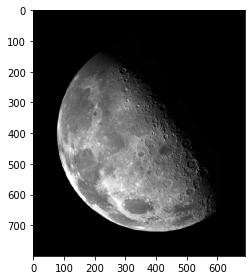

In [169]:
# To display an image loaded with scikit-image library
io.imshow(im_gray)
# 0,0 is on the top right

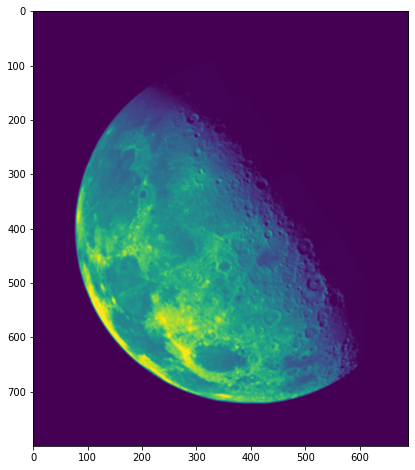

In [170]:
# To display the image with the matplotlib library 
import matplotlib.pylab as plt 
%matplotlib inline         
# create a new figure of where the width = 800 pixels and height = 800 pixels or less 
plt.figure(figsize=(8,8)) 
plt.imshow(im_gray) #changes the color map (from grey to color)

For grayscale images, `cmap` parameter transforms the pixel intensities to a colormap. For information on the different colormaps can be found here.  
https://matplotlib.org/3.1.0/gallery/color/colormap_reference.html

To change the default colormap to a grayscale ranging from white and black, try:  

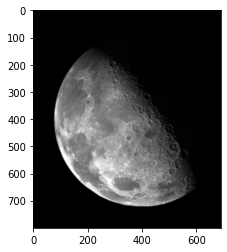

In [171]:
plt.imshow(im_gray,cmap='gray')

The `imshow` function has two parameters `vmin` and `vmax`. All pixels with values less than or equal to the `vmin` parameter are set to black, all pixels with values greater or equal to the `vmax` parameter as white. 

Create code to perform the following
1. Print the maximum and minimum intensities of the converted grayscale images (im_gray) and the original images. You can use `np.amin(im_gray)` to find the minimum intensity of `im_gray`. 
2. Display the converted grayscale images setting `cmap='gray'` setting vmin to the minimum intensity value and vmax to the maximum intensity value
3. Change the value of vmin and vmax (e.g. set `vmin=0` and `vmax = 150`). What do you see?  
4. Display the converted grayscale images setting `cmap='gray_r'`. What do you see? 

1. Print the maximum and minimum intensities of the converted grayscale images (im_gray) and the original images. You can use `np.amin(im_gray)` to find the minimum intensity of `im_gray`. 

In [172]:
# minimum intensity
np.amin(im_gray)

0

In [173]:
# maximum intensity
np.amax(im_gray)

255

In [174]:
# amax can extract the maximum intensity per row 
np.amax(im_gray, axis=1)[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2], dtype=uint8)

2. Display the converted grayscale images setting `cmap='gray'` setting vmin to the minimum intensity value and vmax to the maximum intensity value

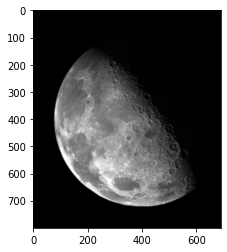

In [175]:
plt.imshow(im_gray,cmap='gray',vmin=0, vmax=255)
# nothing is changing. The values are not set to different scales

3. Change the value of vmin and vmax (e.g. set `vmin=0` and `vmax = 150`). What do you see?  

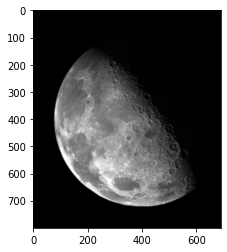

In [176]:
plt.imshow(im_gray,cmap='gray',vmin=0)
# the image is still the same, because the color range is not changed

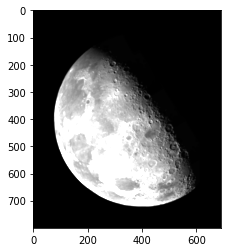

In [177]:
plt.imshow(im_gray,cmap='gray',vmax=150)
# the image looks in general more brighter. This is because all values above 150 are now completly bright

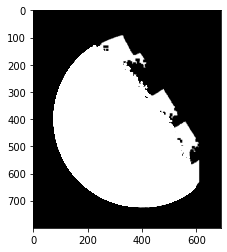

In [178]:
plt.imshow(im_gray,cmap='gray',vmin=1,vmax=2)
# Intensity above 2 is set to 1

4. Display the converted grayscale images setting `cmap='gray_r'`. What do you see? 

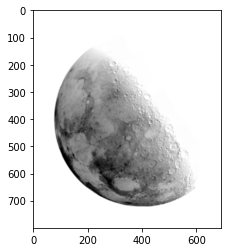

In [179]:
plt.imshow(im_gray,cmap='gray_r') #reversed
# graz_r = new lookup table
# the color is inverted

**vmin, vmax**, 
When using scalar data and no explicit norm, vmin and vmax define the data range that the colormap covers. By default, the colormap covers the complete value range of the supplied data. It is an error to use vmin/vmax when a norm instance is given (but using a str norm name together with vmin/vmax is acceptable).

This parameter is ignored if X is RGB(A).

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html

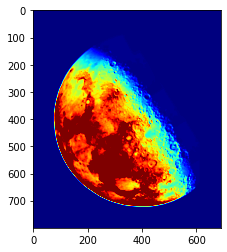

In [180]:
plt.imshow(im_gray,cmap='jet',vmax=150) #reversed
# graz_r = lookup table

The following code displays the color image within the notebook with the matplotlib library

(-0.5, 255.5, 255.5, -0.5)

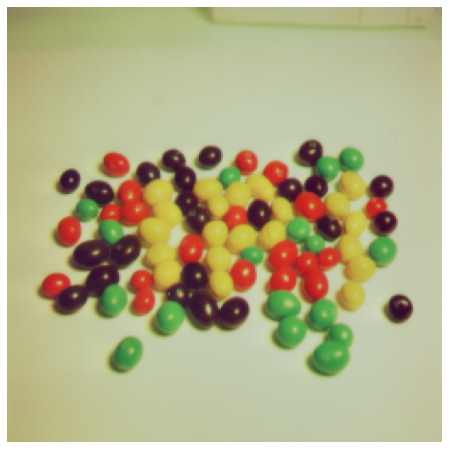

In [181]:
import matplotlib.pylab as plt 
%matplotlib inline         
# create a new figure of where the width = 800 pixels and height = 800 pixels or less 
plt.figure(figsize=(8,8)) 
plt.imshow(im_color)
plt.axis('off')

In [182]:
import matplotlib.pyplot as plt
import numpy as np

# Some example data to display
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

Display the RGB image as well as red, blue and green channels in a subplot. Each image is labelled with the color band.

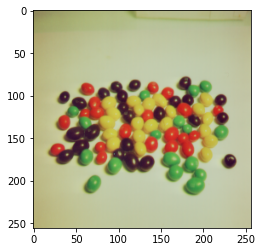

In [183]:
plt.imshow(im_color, cmap='Reds')

In [184]:
im = im_color
im_r = np.zeros(np.shape(im))
im_g = np.zeros(np.shape(im))
im_b = np.zeros(np.shape(im))

In [185]:
im_r = im[:, :, 0]
im_g = im[:, :, 1]
im_b = im[:, :, 2]

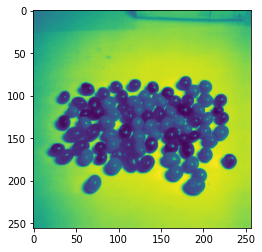

In [186]:
plt.imshow(im_b)


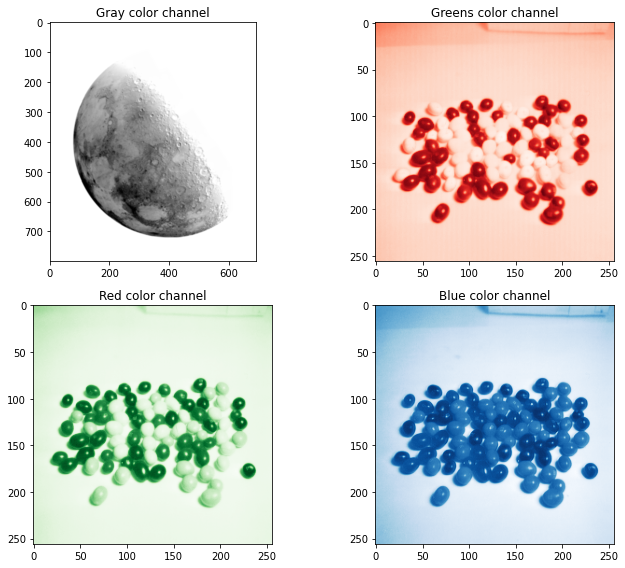

In [187]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs[0, 0].imshow(im_gray,cmap='gray_r')
axs[0, 1].imshow(im_r, cmap="Reds_r")
axs[1, 0].imshow(im_g, cmap="Greens_r")
axs[1, 1].imshow(im_b, cmap="Blues_r")

axs[0, 0].set_title('Gray color channel' )
axs[1, 0].set_title('Red color channel')
axs[0, 1].set_title('Greens color channel')
axs[1, 1].set_title('Blue color channel')
plt.tight_layout()

In [188]:
# TODO check out version with "subplot" and "plt"

In [189]:
# why is yellow bright? 
# because it is a combination of red and + green light

## 1.3 Saving the image 
The folliwng code shows how you can write images to disk. When the code runs successfully, image files will be created in the directory you specified.  

In [190]:
import os
os.makedirs("images_save", exist_ok=True)

In [191]:
# writing a grayscale image to disk with the sckit-image library  
io.imsave("images_save/gray_image.jpg",im_gray)

# writing an color image to disk with the sckit-image library  
io.imsave("images_save/color_image.jpg",im_color)

# writing an image (blue channel) to disk with the sckit-image library  
io.imsave("images_save/blue_ch_image.jpg",im_color[:,:,2]) #3 possible -> only for RGBa (then 4 channels)

# Image Datatypes and Classes 

There are different image types and image classes which can be read and processed in Python.  
Single channel images where each pixel is represented by a single value include: 
* (Grayscale( Intensity images: 
  * uint16 [0, 65535] (CCD cameras on microscopes, medical images, some satellite images) 
  * uint8 [0, 255] (From your standard digital camera) 
  * float64 [$−2^{32}, −2^{32}$] 
* Binary images (black and white)
  * logical, 0 or 1
In multi-channel images, each pixel is represented by a tuple of values, such as: 
* 3 channel images, for example:  
    * RGB images where each pixel is represented by 3 values representing red, green, and blue channel color  
    * HSV images where each pixel is represented by 3 values representing hue, saturation and value channel 
* Four-channel images, for example:
    * RGBA images where each pixel is represented by 4 values representing red, green, blue channel colors and alpha (the transparency)

## 2.1 Converting RGB images to HSV images
HSV images comprises of three channels 
* h (hue or color: dominant wave length of reflected light),
* s (saturation or how much the color is mixed with white) and 
* v (value or brightness or how much the color is mixed with black) 
The HSV model describes colors in a similar manner to how the human eye tends to perceive colors. An colored RGB image can be converted into an HSV image using the hsv2rgb() function from the scikit-image color module.  The following code converts an rgb to a hsv image. 

In [192]:
from skimage import io, color
im = io.imread("images/4.1.08.tiff")     # read image from disk, provide the correct path 
print(im.shape, im.dtype, type(im)) # (362, 486, 3) uint8 <class 'numpy.ndarray'> 
imhsv = color.rgb2hsv(im) # from RGB to HSV color space # change the saturation

(256, 256, 3) uint8 <class 'numpy.ndarray'>


In [193]:
im_converted_gray = color.rgb2gray(im) # from RGB to HSV color space # change the saturation

Display the HSV image as well as hue, saturation and value channels in a subplot. Label each image with the HSV band 

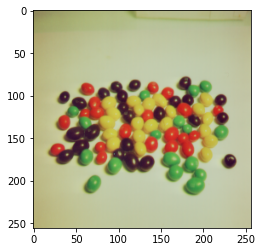

In [194]:
plt.imshow(im)

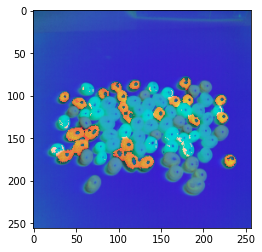

In [195]:
plt.imshow(imhsv)

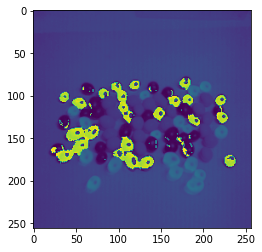

In [196]:
plt.imshow(imhsv[:, :, 0]) #hue

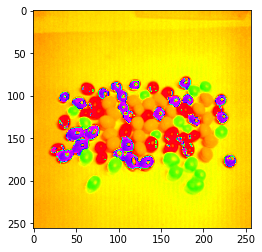

In [197]:
plt.imshow(imhsv[:, :, 0], cmap="gist_rainbow")  #hue + rainbow 

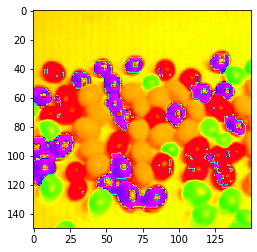

In [198]:
plt.imshow(imhsv[50:200:,50:200 :, 0], cmap="gist_rainbow") #hue + rainbow + zoom

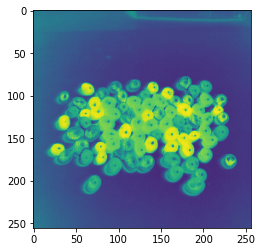

In [199]:
plt.imshow(imhsv[:, :, 1]) #saturation

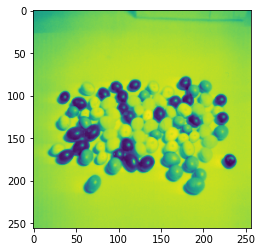

In [200]:
plt.imshow(imhsv[:, :, 2]) #value

## 2.2 Converting RGB images to grayscale 
The following code show how you can convert an RGB image to a grayscale image with different Python libraries. 

In [201]:
# load an image as grayscale with PIL 
from skimage import io, color
import numpy as np

# convert an image to grayscale with sckit-image 
imSK = io.imread("images/tilburg_700.jpg") # read image from disk, provide the correct path 
imSKgray = color.rgb2gray(imSK)
print(imSKgray.shape, imSKgray.dtype, type(imSKgray)) 

(450, 700) float64 <class 'numpy.ndarray'>


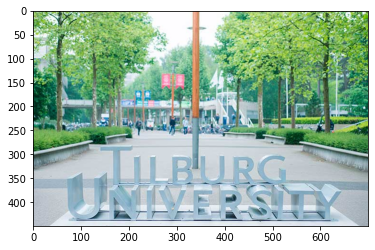

In [202]:
plt.figure()
plt.imshow(imSK)

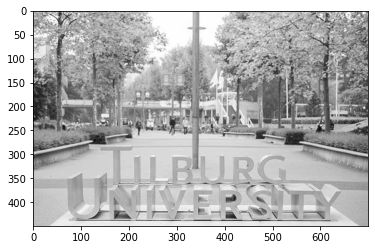

In [203]:
plt.figure()
plt.imshow(imSKgray, cmap="gray")

## 2.3 Datatypes
Images read from disk in the form of an unsigned integer ($uint16$ denotes 16-bit unsigned integer, and $uint8$ denotes 8-bit unsigned integer). However, some mathematical operations that involve a decimal point, such as log) can only be done with arrays of type $float$. The following code first loads the image from disk and then converts it from $uint8$ to $float$.


In [204]:
from skimage import io, color
im = io.imread("images/tilburg_700.jpg")     # read image from disk, provide the correct path 
print(im.shape, im.dtype, type(im)) 
print('minimum intensity: ', np.amin(im)) #print out the minimum intensity
print('maximum intensity: ', np.amax(im)) #print out the maximum intensity

imf = im.astype(float) #normalze image (0-1)
print(imf.shape, imf.dtype, type(imf)) 
print('minimum intensity: ', np.amin(imf)) #print out the minimum intensity
print('maximum intensity: ', np.amax(imf)) #print out the maximum intensity

(450, 700, 3) uint8 <class 'numpy.ndarray'>
minimum intensity:  0
maximum intensity:  255
(450, 700, 3) float64 <class 'numpy.ndarray'>
minimum intensity:  0.0
maximum intensity:  255.0


Many Python image processing operations operate under the assumption that the image is scaled to the range [0,1]. For instance, when imshow displays an float image, it displays an intensity of 0 as black and 1 as white. We can automatically create a scaled double image using rgb2gray. 

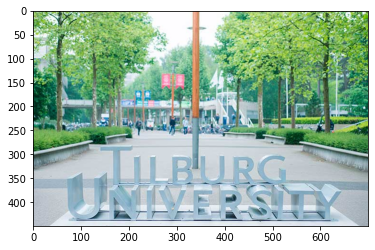

In [205]:
plt.figure()
plt.imshow(im)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


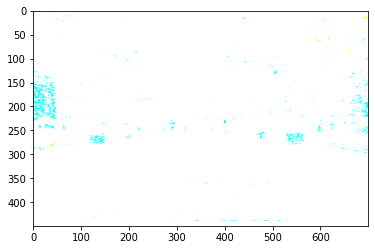

In [206]:
plt.figure()
plt.imshow(imf) # maximum and minimum is 0 and 1 (this does not not work)

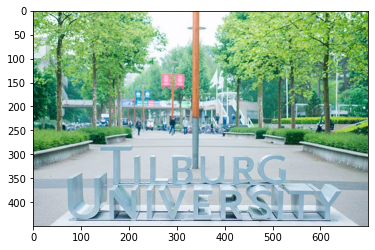

In [207]:
plt.figure()
imf_0_1 = imf/255
plt.imshow(imf_0_1) #needs to be a floating point image

In [208]:
imf_0_1[:1]

array([[[0.7372549 , 0.92156863, 0.70588235],
        [0.41960784, 0.61176471, 0.35294118],
        [0.36470588, 0.58039216, 0.22352941],
        ...,
        [0.66666667, 0.82352941, 0.67843137],
        [0.57254902, 0.70980392, 0.58039216],
        [0.43137255, 0.56078431, 0.43921569]]])

# 3. Image Operations 
You can add, subtract, multiple and divide images of the same size. 

## 3.1 Adding two images (float and unsigned int|)
Let's compare the results of adding two images. The following code loads two RGB images 

In [209]:
from skimage import io, color, data
import numpy as np
import matplotlib.pylab as plt 
%matplotlib inline        

# load two RGB images 
im1 = io.imread('images/4.1.05.tiff'); 
im2 = io.imread('images/4.1.08.tiff'); 

We will compare the results of adding unsigned integer images with images in the 'float' datatypes. 

1. Print the datatype, (e.g im1.dtype for im1), the maximum and minimum intensity of im1 and im2 
2. Add the two unsigned integer images (e.g im3 = im1 + im2) 
3. Print the datatype, (e.g im1.dtype for im1), the maximum and minimum intensity of added image
4. Display the RGB image and the red, blue and green channels separately  
5. Convert im1 and im2 to float and add the two images 
6. Print the datatype, (e.g im1.dtype for im1), the maximum and minimum intensity of resultant image of 5.
7. Divide the resultant image by the maximum intensity 
8. Display the image obtained in 7 and its red, blue and green channels separately  

In [210]:
# 1. Print the datatype, (e.g im1.dtype for im1), the maximum and minimum intensity of im1 and im2 
print("Type of image 1:",type(im1))
print("Type of image 2:",type(im2))
print("Type of entry of image 1:",type(im1[0,0,0]))
print("Type of entry of image 2:",type(im2[0,0,0]),'\n')

#2. Add the two unsigned integer images (e.g im3 = im1 + im2) 
print("Type of adding entry of image 1 and image 2:",type(im1[0,0,0] + im2[0,0,0]),'\n')

# 3. Print the datatype, (e.g im1.dtype for im1), the maximum and minimum intensity of added image
print("Maximum intensity of im1:",np.amax(im1))
print("Minimum intensity of im1:",np.amin(im1))
print("Maximum intensity of im2:",np.amax(im2))
print("Minimum intensity of im2:",np.amin(im2))

Type of image 1: <class 'numpy.ndarray'>
Type of image 2: <class 'numpy.ndarray'>
Type of entry of image 1: <class 'numpy.uint8'>
Type of entry of image 2: <class 'numpy.uint8'> 

Type of adding entry of image 1 and image 2: <class 'numpy.uint8'> 

Maximum intensity of im1: 246
Minimum intensity of im1: 0
Maximum intensity of im2: 220
Minimum intensity of im2: 9


c:\Users\tobi1\anaconda3\envs\aiii\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in ubyte_scalars
  


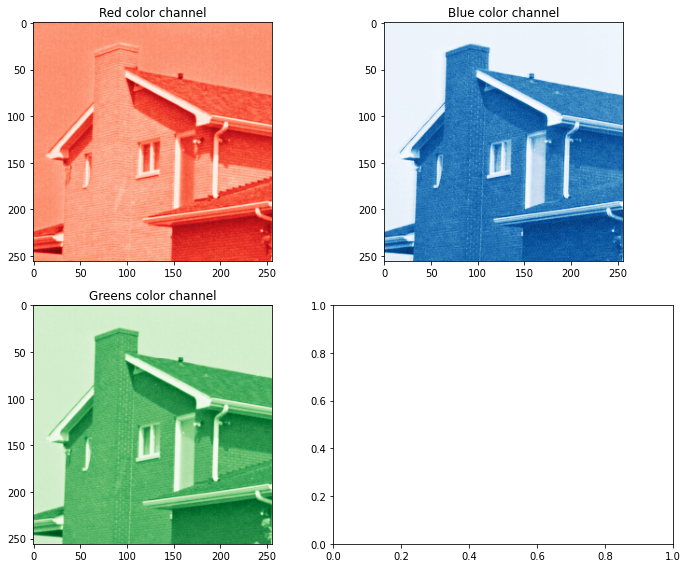

In [211]:
# 4. Display the RGB image and the red, blue and green channels separately  
im = im1
im_r = np.zeros(np.shape(im))
im_g = np.zeros(np.shape(im))
im_b = np.zeros(np.shape(im))

im_r = im[:, :, 0]
im_g = im[:, :, 1]
im_b = im[:, :, 2]

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs[0, 0].imshow(im_r, cmap="Reds_r")
axs[1, 0].imshow(im_g, cmap="Greens_r")
axs[0, 1].imshow(im_b, cmap="Blues_r")

axs[0, 0].set_title('Red color channel')
axs[1, 0].set_title('Greens color channel')
axs[0, 1].set_title('Blue color channel')
plt.tight_layout()

In [212]:
# 5. Convert im1 and im2 to float and add the two images 
im1_float = im1.astype(float)
im2_float = im2.astype(float)
im3_float_combined = im1_float + im2_float

In [213]:
im3_float_combined[0][0]

array([296., 132., 312.])

In [214]:
# 6. Print the datatype, (e.g im1.dtype for im1), the maximum and minimum intensity of resultant image of 5.
print("Type of im3_float_combined:",type(im3_float_combined))
print("Type of entry of im3_float_combined:",type(im3_float_combined[0,0,0]))
print("Maximum intensity of im3_float_combined:",np.amax(im3_float_combined))
print("Minimum intensity of im3_float_combined:",np.amin(im3_float_combined))

Type of im3_float_combined: <class 'numpy.ndarray'>
Type of entry of im3_float_combined: <class 'numpy.float64'>
Maximum intensity of im3_float_combined: 451.0
Minimum intensity of im3_float_combined: 51.0


In [215]:
# 7. Divide the resultant image by the maximum intensity
im3_float_combined_standardized = im3_float_combined / 451.0

In [216]:
np.amax(im3_float_combined_standardized)

1.0

In [217]:
print("Maximum intensity of im3_float_combined:",np.amax(im3_float_combined_standardized))
print("Minimum intensity of im3_float_combined:",np.amin(im3_float_combined_standardized))

Maximum intensity of im3_float_combined: 1.0
Minimum intensity of im3_float_combined: 0.1130820399113082


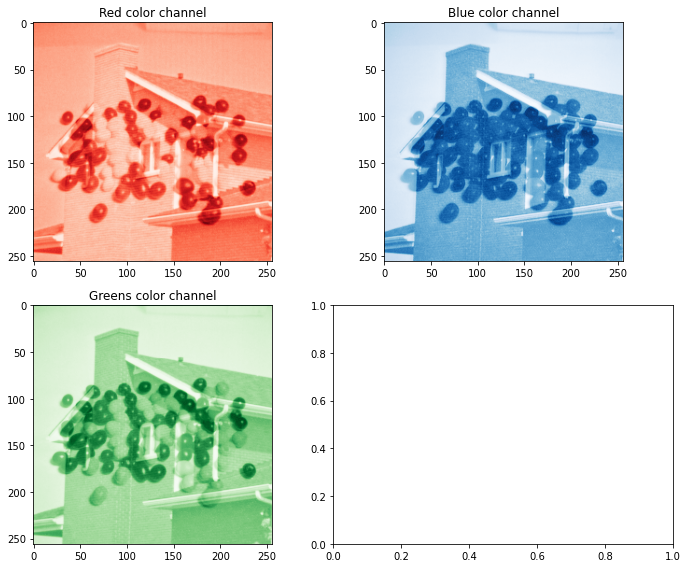

In [218]:
# 8. Display the image obtained in 7 and its red, blue and green channels separately  

# 4. Display the RGB image and the red, blue and green channels separately  
im = im3_float_combined_standardized
im_r = np.zeros(np.shape(im))
im_g = np.zeros(np.shape(im))
im_b = np.zeros(np.shape(im))

im_r = im[:, :, 0]
im_g = im[:, :, 1]
im_b = im[:, :, 2]

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs[0, 0].imshow(im_r, cmap="Reds_r")
axs[1, 0].imshow(im_g, cmap="Greens_r")
axs[0, 1].imshow(im_b, cmap="Blues_r")

axs[0, 0].set_title('Red color channel')
axs[1, 0].set_title('Greens color channel')
axs[0, 1].set_title('Blue color channel')
plt.tight_layout()

## 3.2 Subtract two images 
Let's compare the results of subtracting an image by another images. Perform an image subtraction with the same images as in 3.1

In [219]:
im4_float_combined = im1_float - im2_float

In [220]:
print("Maximum intensity of im3_float_combined:",np.amax(im4_float_combined))
print("Minimum intensity of im3_float_combined:",np.amin(im4_float_combined))

Maximum intensity of im3_float_combined: 220.0
Minimum intensity of im3_float_combined: -188.0


In [221]:
im4_float_combined = im4_float_combined/220

In [222]:
print("Maximum intensity of im3_float_combined:",np.amax(im4_float_combined))
print("Minimum intensity of im3_float_combined:",np.amin(im4_float_combined))

Maximum intensity of im3_float_combined: 1.0
Minimum intensity of im3_float_combined: -0.8545454545454545


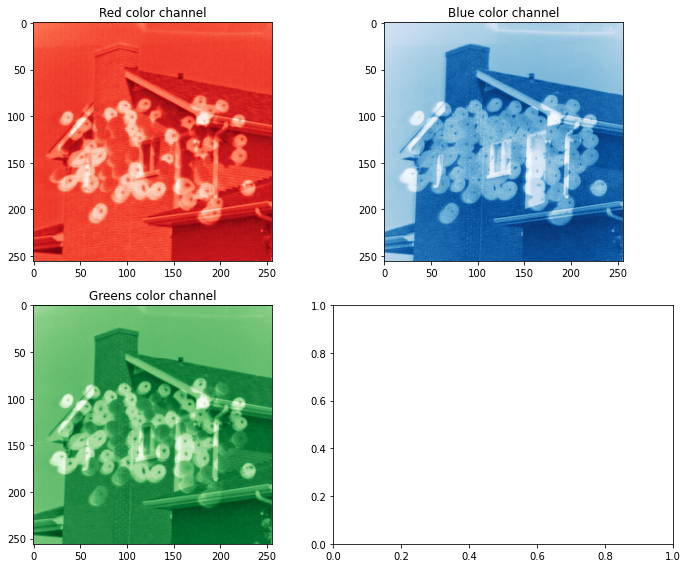

In [223]:
# 8. Display the image obtained in 7 and its red, blue and green channels separately  

# 4. Display the RGB image and the red, blue and green channels separately  
im = im4_float_combined
im_r = np.zeros(np.shape(im))
im_g = np.zeros(np.shape(im))
im_b = np.zeros(np.shape(im))

im_r = im[:, :, 0]
im_g = im[:, :, 1]
im_b = im[:, :, 2]

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs[0, 0].imshow(im_r, cmap="Reds_r")
axs[1, 0].imshow(im_g, cmap="Greens_r")
axs[0, 1].imshow(im_b, cmap="Blues_r")

axs[0, 0].set_title('Red color channel')
axs[1, 0].set_title('Greens color channel')
axs[0, 1].set_title('Blue color channel')
plt.tight_layout()

# Advanced level 

# 4. Loading a collection of images  
Use the scikit-image library's functions (e.g. io.ImageCollection) to read a collection of images and display them as a montage. 
In other words, display the images using subplots where each subplot shows one image. You will need to set the number of rows or columns in the subplot such that all the images are displayed. 
https://scikit-image.org/docs/0.7.0/api/skimage.io.collection.html

In [224]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [225]:
coll = io.ImageCollection('images/*.jpg')
print(len(coll))

8


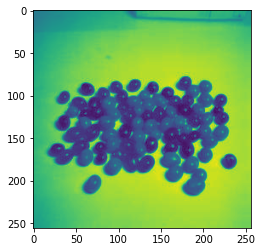

In [226]:
plt.figure()
plt.imshow(coll[0])

In [227]:
plt.figure(figsize=(8,8)) 

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

8 3


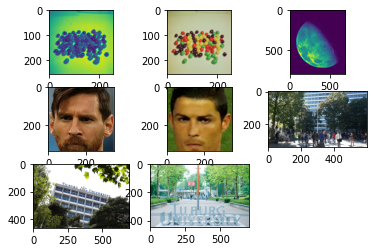

In [228]:
i = 1
numCol = int(np.ceil(len(coll)/3)) # np.ceil = higher int
print(len(coll),numCol)
for img in coll:
    plt.subplot(3,numCol,i)
    plt.imshow(img)
    i +=1

# 5. Blend two images (alpha blending) 

You can create a new image by interpolating between two given images (of the same size and same mode) by using constant alpha. 
This is known as image morphing or alpha blending of two images using cross dissolving.  The value alpha typically ranges between 0 and 1.  

        output = im1 * (1.0 - alpha) + im2 * alpha

The following code creates space for a large figure and loads an image of Messi (im1) and an image of Ronaldo. 

In [229]:
plt.figure(figsize=(18,15)) 
im1 = io.imread("images/messi.jpg");
im2 = io.imread("images/ronaldo.jpg");

<Figure size 1296x1080 with 0 Axes>

Start with one face image (e.g the face of Messi) and end up with another image (the face of Ronaldo) by varying the values of alpha in a for loop. Eg: 

        for alpha in np.linspace(0,1,20):   

Display the output image for each alpha value.  

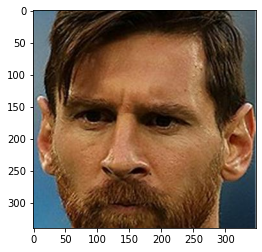

In [230]:
plt.figure() 
plt.imshow(im1)
plt.savefig('gif_images/messi.png')

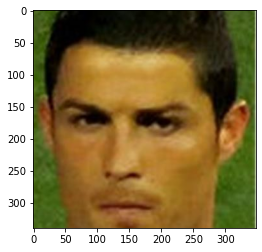

In [231]:
plt.figure() 
plt.imshow(im2)
plt.savefig('gif_images/ronlado.png')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


uint8 float64


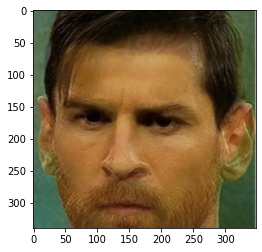

In [232]:
alpha = 0.5


blend = im1*(1-alpha) + im2*(alpha)

print(im1.dtype, blend.dtype) # does not work because it is a float
plt.imshow(blend)

plt.imshow(blend.astype('uint8'))
plt.savefig('gif_images/blended.png')

0.0
0.05263157894736842
0.10526315789473684
0.15789473684210525
0.21052631578947367
0.2631578947368421
0.3157894736842105
0.3684210526315789
0.42105263157894735
0.47368421052631576
0.5263157894736842
0.5789473684210527
0.631578947368421
0.6842105263157894
0.7368421052631579
0.7894736842105263
0.8421052631578947
0.894736842105263
0.9473684210526315
1.0


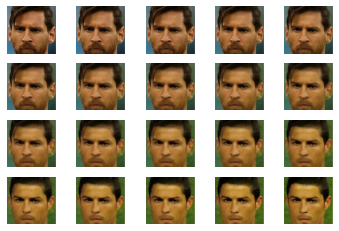

In [233]:
i = 1
for alpha in np.linspace(0,1,20):
    print(alpha)
    blend = im1*(1-alpha) + im2*(alpha)
    plt.subplot(4,5,i)
    plt.imshow(blend.astype('uint8'))
    plt.axis('off')
    plt.savefig('gif_images/blended_{}.png'.format(alpha))
    i+=1

0.0
0.05263157894736842
0.10526315789473684
0.15789473684210525
0.21052631578947367
0.2631578947368421
0.3157894736842105
0.3684210526315789
0.42105263157894735
0.47368421052631576
0.5263157894736842
0.5789473684210527
0.631578947368421
0.6842105263157894
0.7368421052631579
0.7894736842105263
0.8421052631578947
0.894736842105263
0.9473684210526315
1.0


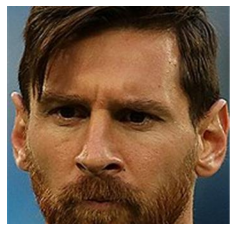

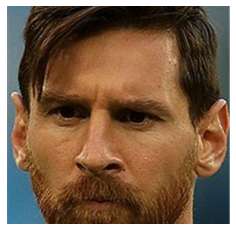

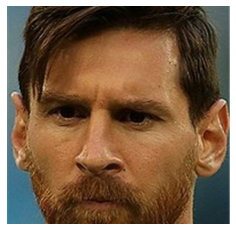

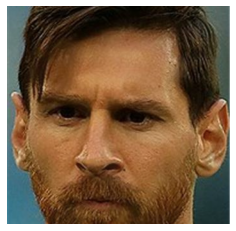

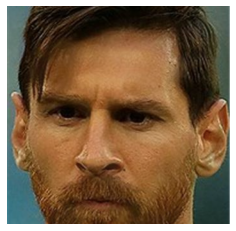

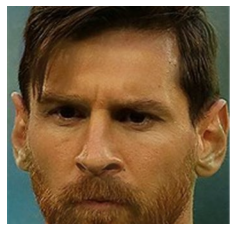

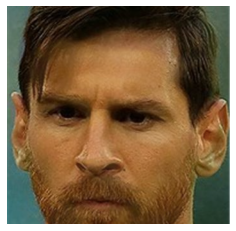

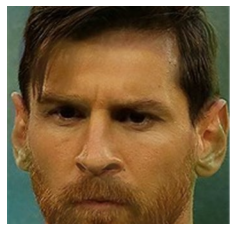

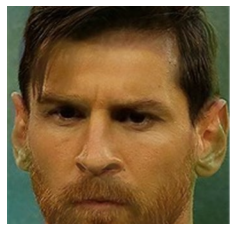

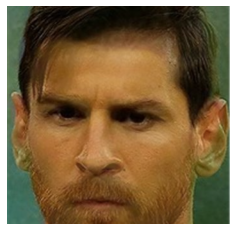

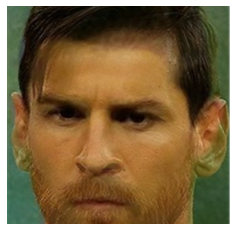

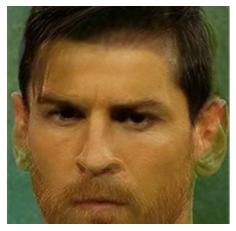

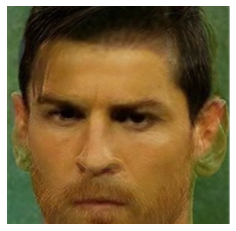

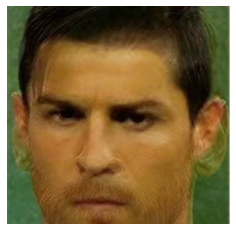

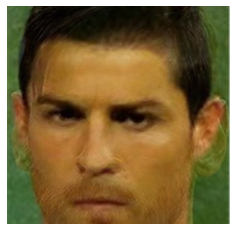

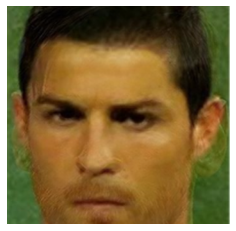

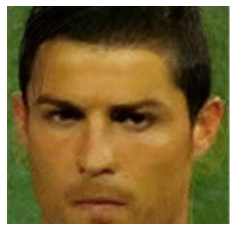

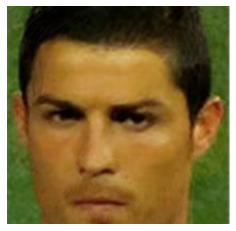

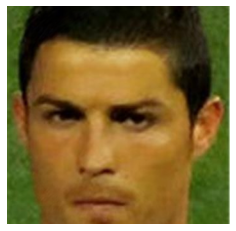

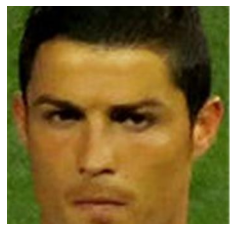

In [234]:
i = 1
for alpha in np.linspace(0,1,20):
    print(alpha)
    blend = im1*(1-alpha) + im2*(alpha)
    plt.figure()
    plt.imshow(blend.astype('uint8'))
    plt.axis('off')
    plt.savefig('gif_images_2/blended_{}.png'.format(alpha))
    i+=1

Append the output (blended) images and create a gif file from all the output images. 

In [235]:
import glob
from PIL import Image
def make_gif(frame_folder):
    frames = [Image.open(image) for image in glob.glob(f"{frame_folder}/*.png")]
    frame_one = frames[0]
    frame_one.save("my_awesome_3.gif", format="GIF", append_images=frames,
               save_all=True, duration=100, loop=0)

In [236]:
make_gif('gif_images_2')

# 6. Image I/O operations with the Python Imaging Library (PIL) 
The following code loads images with the PIL library. You will see that the PIL loads the image as a `PIL.PngImagePlugin.JpegImageFile` object while the other libraries load the images as arrays. 

In [237]:
## Loading an image with PIL 
from PIL import Image
import numpy as np
# read the image from the correct path
imPIL = Image.open("images/tilburg_694.jpg") 
# display the properties of the image  
print(imPIL.width, imPIL.height, imPIL.mode, imPIL.format, type(imPIL))



694 462 RGB JPEG <class 'PIL.JpegImagePlugin.JpegImageFile'>


Let's display the images. A new window is created to display each image.  

In [238]:
import matplotlib.pylab as plt 
import numpy as np 

# To display the PIL image with the PIL library
imPIL.show() 

You can also use the IPython Public API (Application Programming Interface) for displaying images in the notebook. The function $display()$ takes in a PIL Image object. 

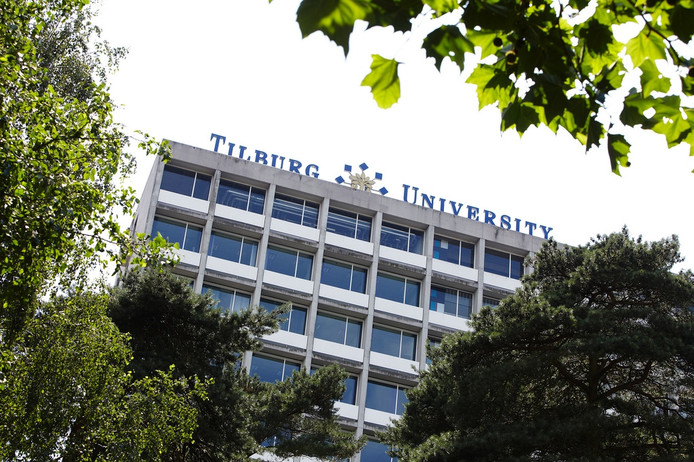

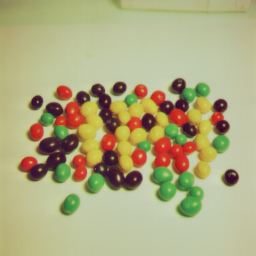

In [239]:
import IPython.display
IPython.display.display(imPIL)
# convert numpy image to PIL Image object for display  
IPython.display.display(Image.fromarray(im_color))

The folliwng code  shows how you can write images to disk. When the code runs successfully, image files will be created in the directory you specified. 

In [240]:
imPIL.save('images/tilburgPIL.png')

The split() operation from PIL can be used separate the image into bands of red, green and blue.
The following code loads a RGB image as a PIL object splits into multiple channels 

In [241]:
imPIL = Image.open("images/4.1.08.tiff") 
im_red, im_green,im_blue = imPIL.split() #extract channels
im_red.show() 

The following code converts the image to grayscale with 

In [242]:
imgGray = imPIL.convert('L')
imgGray.show()
print(imgGray.width, imgGray.height, imgGray.mode, imgGray.format, type(imgGray))
imgGnumpy = np.asarray(imgGray)
print(imgGnumpy.min(),imgGnumpy.max())

print(imgGnumpy.shape, imgGnumpy.dtype, type(imgGnumpy))  

256 256 L None <class 'PIL.Image.Image'>
24 208
(256, 256) uint8 <class 'numpy.ndarray'>


Compare grayscale conversion of two different libraries (PIL and scikit-learn). Take a color image of your choice,
1. convert the color image to grayscale with the PIL. Call this grayscale image as img1 
2. convert the color image to grayscale with the scikit-learn. Call this grayscale image as img2 
3. subtract img1 with img2
4. convert img1 and img2 to 'float', create another image which is the absolute difference of img1 and img2,  and display the results 

If these two libraries return the same grayscale image, you will get a black image (of zeros) as the result. Are they the same? 

In [255]:
# convert to grayscale

# PIL
imPIL_1 = Image.open("images/4.1.08.tiff") 
imPIL_1_grey_PIL = imPIL_1.convert('L') #grey scale conversion

# SKImage
imSKImage_2 = io.imread("images/4.1.08.tiff")
imSKImage_2_grey_skimage = color.rgb2gray(imSKImage_2)


In [256]:
imPIL_1_grey_PIL = np.array(imPIL_1_grey_PIL) #for substracting the images

In [260]:
# print("Data Type imPIL_1:",type(imPIL_2_grey_PIL[0,0,0]))
print("Data Type imPIL_1_grey_PIL:",imPIL_1_grey_PIL.dtype)
print("Maximum intensity of imPIL_1_grey_PIL:",np.amax(imPIL_1_grey_PIL))
print("Minimum intensity of imPIL_1_grey_PIL:",np.amin(imPIL_1_grey_PIL))

Data Type imPIL_1_grey_PIL: uint8
Maximum intensity of imPIL_1_grey_PIL: 208
Minimum intensity of imPIL_1_grey_PIL: 24


In [261]:
print("Data Type imSKImage_2_grey_skimage:",imSKImage_2_grey_skimage.dtype)
print("Maximum intensity of imSKImage_2_grey_skimage:",np.amax(imSKImage_2_grey_skimage))
print("Minimum intensity of imSKImage_2_grey_skimage:",np.amin(imSKImage_2_grey_skimage))

Data Type imSKImage_2_grey_skimage: float64
Maximum intensity of imSKImage_2_grey_skimage: 0.8223701960784314
Minimum intensity of imSKImage_2_grey_skimage: 0.07714745098039215


In [267]:
im3 = imPIL_1_grey_PIL.astype(float) - imSKImage_2_grey_skimage
im3 = im3+np.amin(im3)
im3 = im3/np.amax(im3)

In [268]:
print("Data Type im3:",im3.dtype)
print("Maximum intensity of im3:",np.amax(im3))
print("Minimum intensity of im3:",np.amin(im3))

Data Type im3: float64
Maximum intensity of im3: 1.0
Minimum intensity of im3: 0.2070255479815809


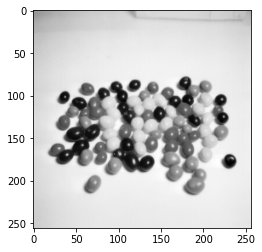

In [271]:
plt.figure()
plt.imshow(im3, cmap='gray')